<a href="https://colab.research.google.com/github/Jimmy-Rais/Machine-Learning/blob/main/Customers_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
Customer segmentation is the process of diving customers of a company into groups(Clusters) to help
the company adjust the sale and marketing strategies based on each cluster behavior ,and hence maximize the business profit
Segmentation factors :
 Demographic(Age,gender,income)
 Psychographic(Interest,Lifestyle)
 Behavioral(Spending habits,brand interactions)
 Geographic (zip code,country)
"""
import numpy as np
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import io

In [3]:
uploaded=files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
cust_data=pd.read_csv(io.BytesIO(uploaded["Mall_Customers.csv"]))

In [5]:
#EDA

cust_data.shape

(200, 5)

In [6]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
cust_data.drop('CustomerID',axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
cust_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
cust_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

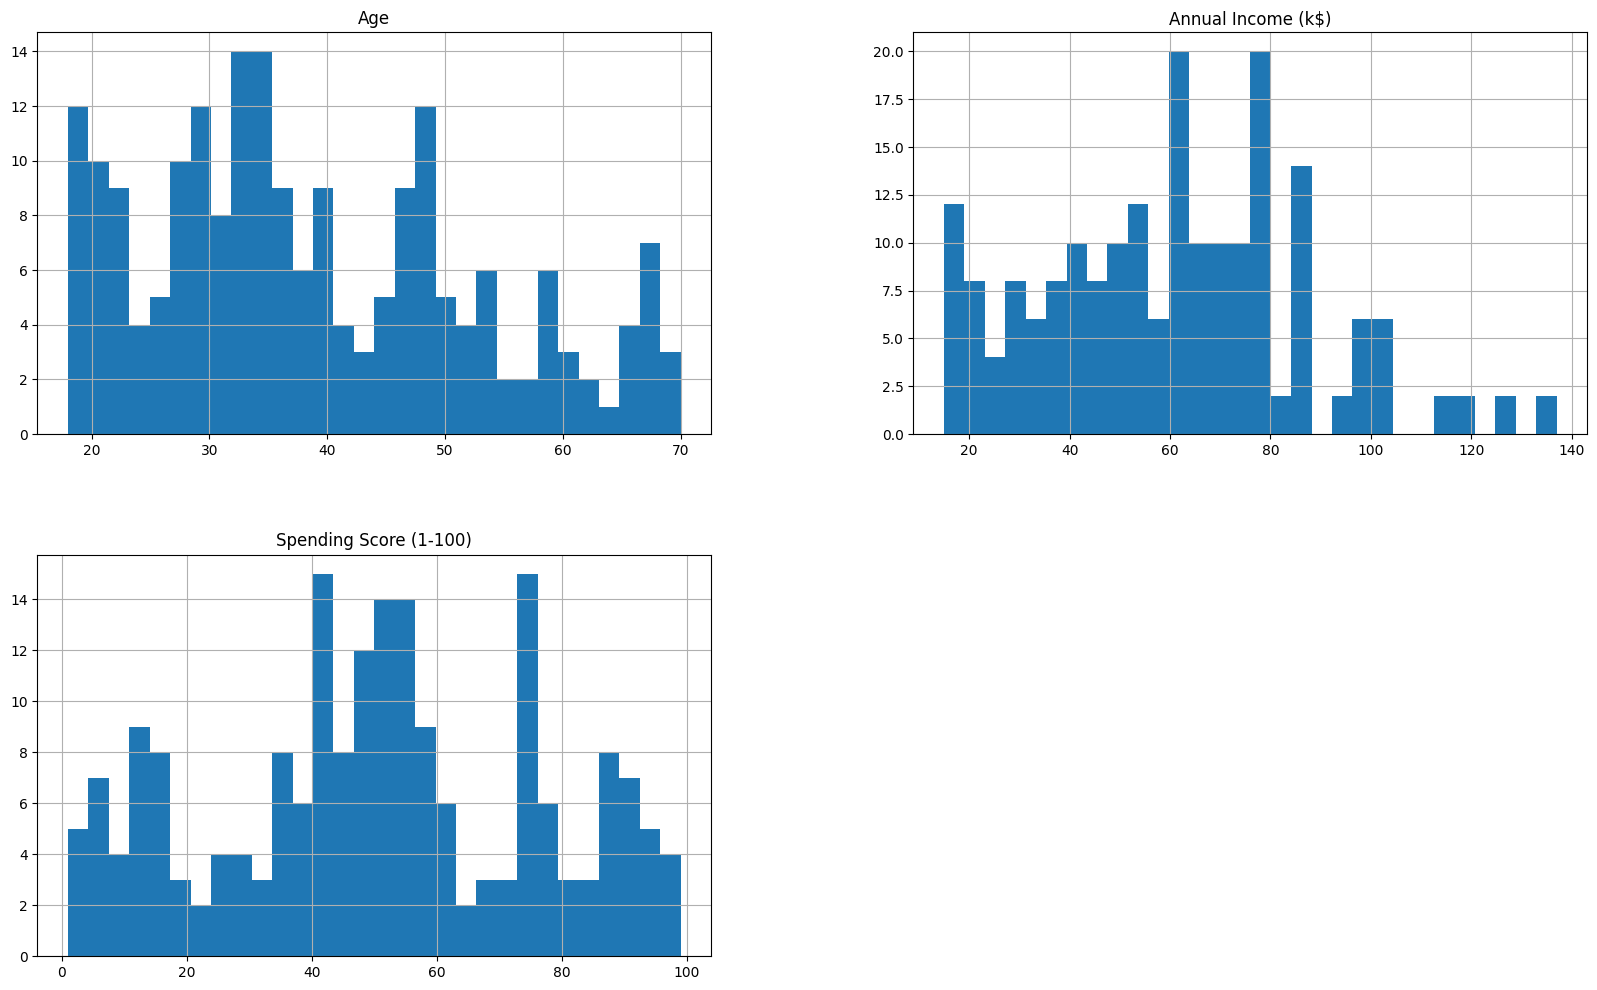

In [11]:
#Plots
cust_data.drop('CustomerID',axis=1).hist(bins=30,figsize=(20,12))

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

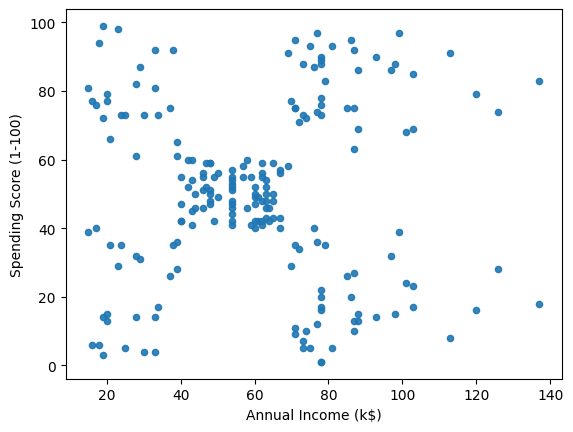

In [12]:
#Age vs income
cust_data.plot(kind='scatter',x='Annual Income (k$)',y='Spending Score (1-100)',alpha=0.9)

<Axes: xlabel='count', ylabel='Gender'>

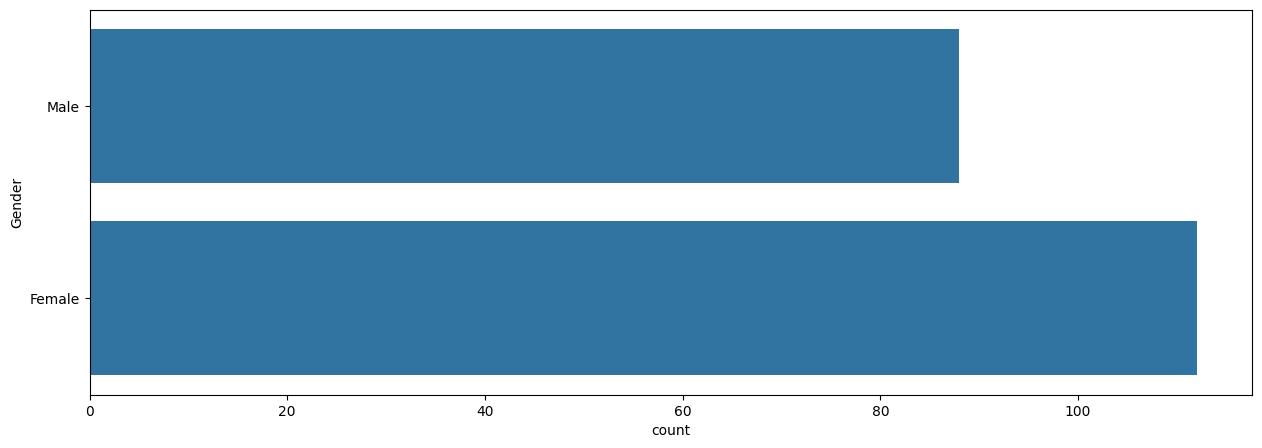

In [13]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=cust_data)

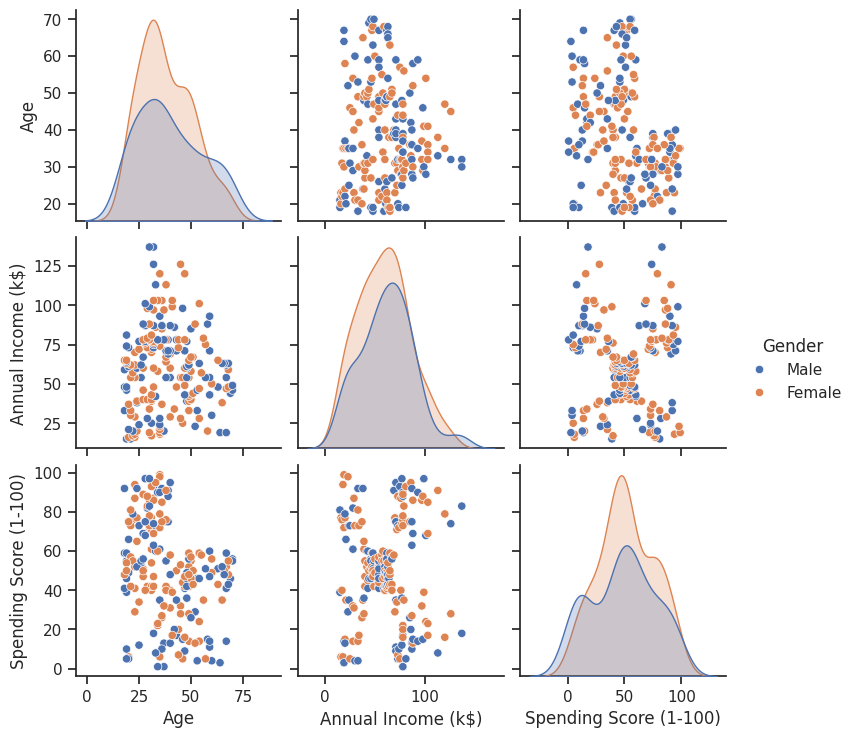

In [14]:
sns.set(style="ticks")
sns.pairplot(cust_data.drop('CustomerID',axis=1),hue='Gender')
plt.show()

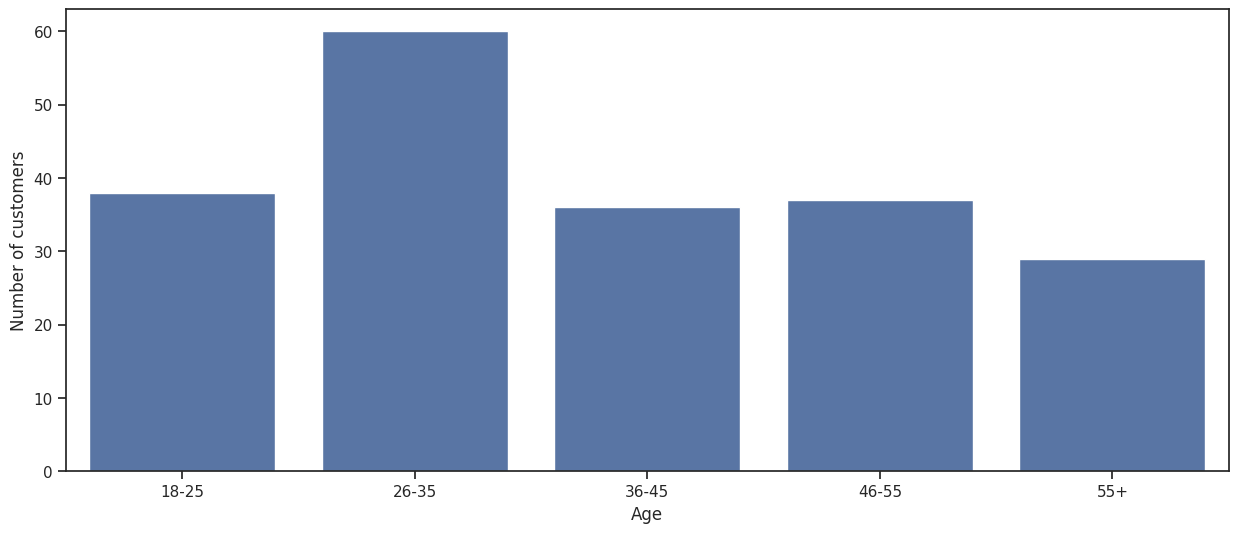

In [16]:
age_18_25=cust_data.Age[(cust_data.Age>=18)&(cust_data.Age<=25)]
age_26_35=cust_data.Age[(cust_data.Age>=26)&(cust_data.Age<=35)]
age_36_45=cust_data.Age[(cust_data.Age>=36)&(cust_data.Age<=45)]
age_46_55=cust_data.Age[(cust_data.Age>=46)&(cust_data.Age<=55)]
age_55_above=cust_data.Age[(cust_data.Age>=56)]
agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55_above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey)
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

<ipython-input-18-bd7a5253d0ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ss_x,y=ss_y,palette="rocket")


Text(0, 0.5, 'Number of customers')

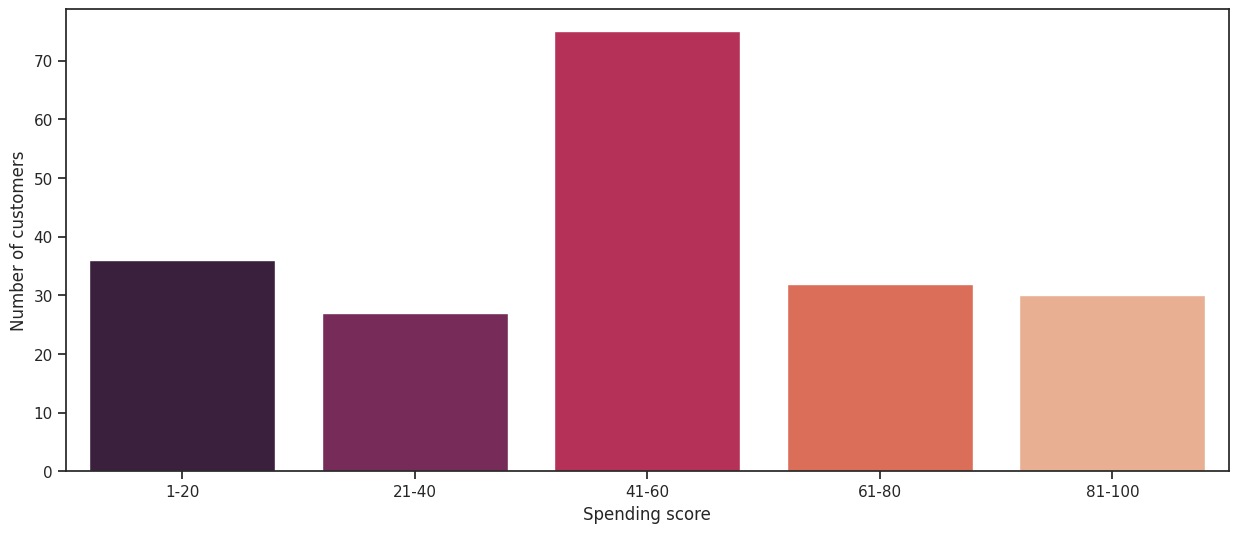

In [18]:
ss_1_20=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=1)&(cust_data["Spending Score (1-100)"]<=20)]
ss_21_40=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=21)&(cust_data["Spending Score (1-100)"]<=40)]
ss_41_60=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=41)&(cust_data["Spending Score (1-100)"]<=60)]
ss_61_80=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=61)&(cust_data["Spending Score (1-100)"]<=80)]
ss_81_100=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=81)&(cust_data["Spending Score (1-100)"]<=100)]
ss_x=["1-20","21-40","41-60","61-80","81-100"]
ss_y=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ss_x,y=ss_y,palette="rocket")
plt.xlabel("Spending score")
plt.ylabel("Number of customers")

<ipython-input-21-47c401dc439e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ai_x,y=ai_y,palette="rocket")


Text(0, 0.5, 'Number of Customers')

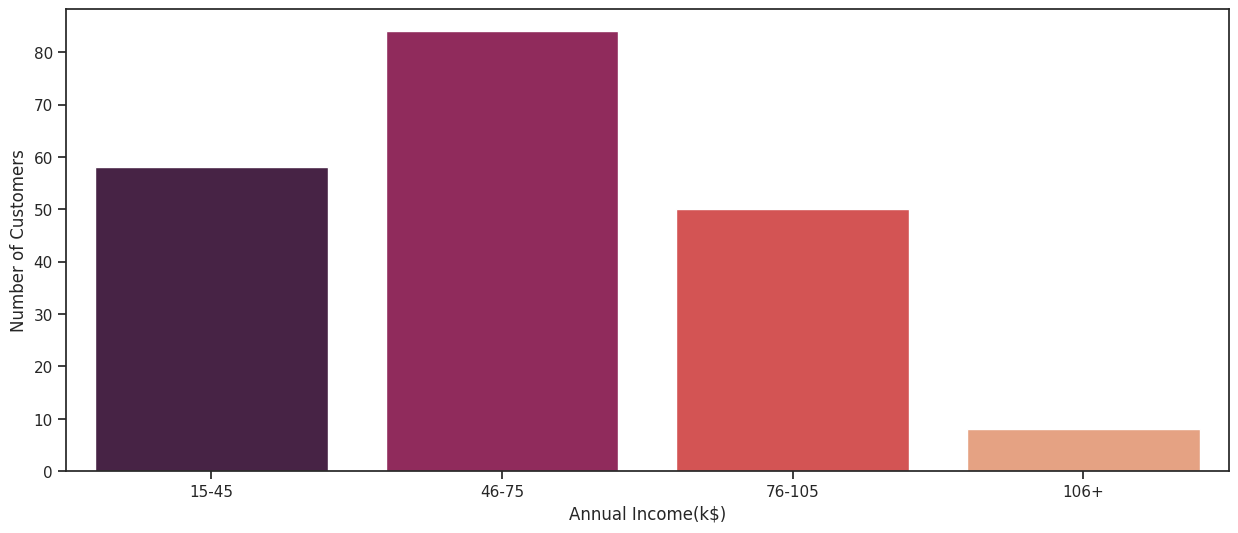

In [21]:
ai_15_45=cust_data["Annual Income (k$)"][(cust_data["Annual Income (k$)"]>=1)&(cust_data["Annual Income (k$)"]<=45)]
ai_46_75=cust_data["Annual Income (k$)"][(cust_data["Annual Income (k$)"]>=46)&(cust_data["Annual Income (k$)"]<=75)]
ai_76_105=cust_data["Annual Income (k$)"][(cust_data["Annual Income (k$)"]>=76)&(cust_data["Annual Income (k$)"]<=105)]
ai_105_above=cust_data["Annual Income (k$)"][(cust_data["Annual Income (k$)"]>105)]
ai_x=["15-45","46-75","76-105","106+"]
ai_y=[len(ai_15_45.values),len(ai_46_75.values),len(ai_76_105.values),len(ai_105_above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ai_x,y=ai_y,palette="rocket")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Number of Customers")